<a href="https://colab.research.google.com/github/saffarizadeh/BUAN4061/blob/main/TensorFlow_Datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="http://saffarizadeh.com/Logo.png" width="300px"/>

# *BUAN 4061: Advanced Business Analytics*

# **TensorFlow Datasets**

Instructor: Dr. Kambiz Saffarizadeh

---

List of available datasets:

https://www.tensorflow.org/datasets/catalog/overview

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt

`tfds` shows a progress bar when dowloading datasets. If you wish to disable the progress bar, run the following code:

In [ ]:
tfds.disable_progress_bar()

# Loading Data via `keras.datasets`

In [ ]:
(training_images_1, training_labels_1), (test_images_1, test_labels_1) =  tf.keras.datasets.fashion_mnist.load_data()

In [ ]:
training_images_1.shape

(60000, 28, 28)

# Loading Data via `tfds`

Read the following documentation to learn how tfds.load works:

https://www.tensorflow.org/datasets/api_docs/python/tfds/load

You can retrieve the same dataset via `tfds` using the following code:

In [ ]:
(training_images_2, training_labels_2), (test_images_2, test_labels_2) =  tfds.as_numpy(tfds.load('fashion_mnist', split = ['train', 'test'], batch_size = -1, as_supervised=True))

In [ ]:
training_images_2.shape

(60000, 28, 28, 1)

While this code is more complicated, it gives us more flexibility to work with the dataset.

In the code above, we attempted to get the whole dataset by setting `batch_size = -1` and convert the whole dataset to numpy (`tfds.as_numpy()`) so that the result look similar to our previous examples.

However, in reality we don't need to take these steps to train our models. Instead, we use the following approach.

## Creating train and validation splits

In [ ]:
data = tfds.load('fashion_mnist', split='train', as_supervised=True)
val_data = tfds.load('fashion_mnist', split='test', as_supervised=True)

In [ ]:
data

<PrefetchDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

## Creating train, validation, and test splits

We can use TensorFlow's subsplit API:

In [ ]:
train_data, info = tfds.load('horses_or_humans', split='train[:80%]', as_supervised=True, with_info = True)
validation_data = tfds.load('horses_or_humans', split='train[80%:]', as_supervised=True)
test_data = tfds.load('horses_or_humans', split='test', as_supervised=True)

In [ ]:
train_data

<PrefetchDataset element_spec=(TensorSpec(shape=(300, 300, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [ ]:
info

tfds.core.DatasetInfo(
    name='horses_or_humans',
    version=3.0.0,
    description='A large set of images of horses and humans.',
    homepage='http://laurencemoroney.com/horses-or-humans-dataset',
    features=FeaturesDict({
        'image': Image(shape=(300, 300, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    }),
    total_num_examples=1283,
    splits={
        'test': 256,
        'train': 1027,
    },
    supervised_keys=('image', 'label'),
    citation="""@ONLINE {horses_or_humans,
    author = "Laurence Moroney",
    title = "Horses or Humans Dataset",
    month = "feb",
    year = "2019",
    url = "http://laurencemoroney.com/horses-or-humans-dataset"
    }""",
    redistribution_info=,
)

In [ ]:
info.features['label'].names

['horses', 'humans']

In [ ]:
classes = info.features['label'].names

Alternatively, we can load the data as follows:

In [ ]:
[train_data, validation_data, test_data], info = tfds.load('horses_or_humans', split=['train[:80%]', 'train[80%:]', 'test'], as_supervised=True, with_info = True)

In [ ]:
train_data

<PrefetchDataset element_spec=(TensorSpec(shape=(300, 300, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [ ]:
info

tfds.core.DatasetInfo(
    name='horses_or_humans',
    version=3.0.0,
    description='A large set of images of horses and humans.',
    homepage='http://laurencemoroney.com/horses-or-humans-dataset',
    features=FeaturesDict({
        'image': Image(shape=(300, 300, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    }),
    total_num_examples=1283,
    splits={
        'test': 256,
        'train': 1027,
    },
    supervised_keys=('image', 'label'),
    citation="""@ONLINE {horses_or_humans,
    author = "Laurence Moroney",
    title = "Horses or Humans Dataset",
    month = "feb",
    year = "2019",
    url = "http://laurencemoroney.com/horses-or-humans-dataset"
    }""",
    redistribution_info=,
)

Read the following notebook to learn more about loading datasets via `tfds`.

https://colab.research.google.com/github/tensorflow/datasets/blob/master/docs/overview.ipynb

### Prepare Data Batches

In [ ]:
train_batches = train_data.cache().shuffle(100).batch(32).prefetch(1)
validation_batches = validation_data.batch(32).prefetch(1)
test_batches = test_data.batch(32)

### Model Architecture

You can include preprocessing layers in your keras models. By doing so, you don't need to be worried about preprocessing the data even when you want to use your model for inference.

You can also add data augmentation layers. These layers will only be used during the training and will not change the model input when used for inference.

In [ ]:
horse_human_model = tf.keras.Sequential([
  # Preprocessing and Augmentation Layers
  tf.keras.layers.Resizing(300, 300, crop_to_aspect_ratio=True),
  tf.keras.layers.Rescaling(1/255.),
  tf.keras.layers.RandomFlip(),
  tf.keras.layers.RandomRotation(40, fill_mode='nearest'),
  # Feature Extraction Layers
  tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D((2,2)),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D((2,2)),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D((2,2)),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D((2,2)),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D((2,2)),
  # Classification Layers
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
horse_human_model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              metrics=['accuracy'])

### Training

In [ ]:
history = horse_human_model.fit(train_batches, epochs=10, validation_data=validation_batches)

Epoch 1/10
26/26 [==============================] - 5s 145ms/step - loss: 0.6388 - accuracy: 0.6776 - val_loss: 0.4735 - val_accuracy: 0.7854
Epoch 2/10
26/26 [==============================] - 2s 65ms/step - loss: 0.3992 - accuracy: 0.8078 - val_loss: 0.3368 - val_accuracy: 0.8049
Epoch 3/10
26/26 [==============================] - 2s 65ms/step - loss: 0.3213 - accuracy: 0.8674 - val_loss: 0.2932 - val_accuracy: 0.8829
Epoch 4/10
26/26 [==============================] - 2s 64ms/step - loss: 0.2949 - accuracy: 0.8869 - val_loss: 0.2999 - val_accuracy: 0.8780
Epoch 5/10
26/26 [==============================] - 2s 65ms/step - loss: 0.2867 - accuracy: 0.8783 - val_loss: 0.2666 - val_accuracy: 0.8585
Epoch 6/10
26/26 [==============================] - 2s 64ms/step - loss: 0.2870 - accuracy: 0.8881 - val_loss: 0.2898 - val_accuracy: 0.8780
Epoch 7/10
26/26 [==============================] - 2s 65ms/step - loss: 0.2522 - accuracy: 0.9039 - val_loss: 0.2532 - val_accuracy: 0.8780
Epoch 8/10
2

### Test Evaluation

In [ ]:
horse_human_model.evaluate(test_batches)

8/8 [==============================] - 1s 64ms/step - loss: 1.5942 - accuracy: 0.6953


[1.594203233718872, 0.6953125]

### Prediction and Inference

In [ ]:
image_batch, label_batch = validation_batches.take(1).get_single_element() # returns 1 batch of data

Real Label: horses
Predicted Label: horses


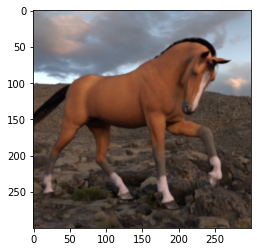

In [ ]:
num = 5
inference = (horse_human_model.predict(image_batch[num:num+1]).item()>0.5)
inference = classes[inference]
plt.imshow(image_batch[num])
print(f'Real Label: {classes[label_batch[num]]}')
print(f'Predicted Label: {inference}')

### Alternative Way to Create the Model

In [ ]:
horse_human_model = tf.keras.Sequential([
  tf.keras.layers.Resizing(300, 300, crop_to_aspect_ratio=True),
  tf.keras.layers.Rescaling(1/255.),
  tf.keras.layers.RandomFlip(),
  tf.keras.layers.RandomRotation(40, fill_mode='nearest'),
  tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D((2,2)),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D((2,2)),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D((2,2)),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D((2,2)),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D((2,2)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(2, activation='softmax')
])

horse_human_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

train_batches = train_data.cache().shuffle(100).batch(32).prefetch(1)
validation_batches = validation_data.batch(32).prefetch(1)

history = horse_human_model.fit(train_batches, epochs=10, validation_data=validation_batches)

Epoch 1/10
26/26 [==============================] - 6s 111ms/step - loss: 0.6802 - accuracy: 0.5547 - val_loss: 0.4768 - val_accuracy: 0.8341
Epoch 2/10
26/26 [==============================] - 2s 67ms/step - loss: 0.4045 - accuracy: 0.8309 - val_loss: 0.3452 - val_accuracy: 0.8829
Epoch 3/10
26/26 [==============================] - 2s 66ms/step - loss: 0.3281 - accuracy: 0.8637 - val_loss: 0.2910 - val_accuracy: 0.8732
Epoch 4/10
26/26 [==============================] - 2s 65ms/step - loss: 0.2740 - accuracy: 0.8990 - val_loss: 0.2845 - val_accuracy: 0.8780
Epoch 5/10
26/26 [==============================] - 2s 65ms/step - loss: 0.3006 - accuracy: 0.8783 - val_loss: 0.2859 - val_accuracy: 0.8585
Epoch 6/10
26/26 [==============================] - 2s 65ms/step - loss: 0.2536 - accuracy: 0.8881 - val_loss: 0.2342 - val_accuracy: 0.9122
Epoch 7/10
26/26 [==============================] - 2s 64ms/step - loss: 0.2196 - accuracy: 0.9063 - val_loss: 0.2491 - val_accuracy: 0.8732
Epoch 8/10
2

### How to manually preprocess the data

Install and import `tensorflow_addons`.

In [ ]:
!pip install tensorflow-addons

In [ ]:
import tensorflow_addons as tfa

Now we can use this addon whenever needed.

We start by creating a function that can be used to augment the data.

In [ ]:
def augment_images(image, label):
  image = tf.cast(image, tf.float32)
  image = image / 255.
  image = tf.image.random_flip_left_right(image)
  image = tfa.image.rotate(image, 40, interpolation='NEAREST')
  return image, label

train_data = train_data.map(augment_images)

# Extra Example: Cats vs Dogs

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_hub as hub

In [ ]:
(train_examples, validation_examples), info = tfds.load(
    'cats_vs_dogs',
    split = ['train[:80%]', 'train[80%:]'],
    with_info = True,
    as_supervised = True
)

In [ ]:
info

tfds.core.DatasetInfo(
    name='cats_vs_dogs',
    version=4.0.0,
    description='A large set of images of cats and dogs.There are 1738 corrupted images that are dropped.',
    homepage='https://www.microsoft.com/en-us/download/details.aspx?id=54765',
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'image/filename': Text(shape=(), dtype=tf.string),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    }),
    total_num_examples=23262,
    splits={
        'train': 23262,
    },
    supervised_keys=('image', 'label'),
    citation="""@Inproceedings (Conference){asirra-a-captcha-that-exploits-interest-aligned-manual-image-categorization,
    author = {Elson, Jeremy and Douceur, John (JD) and Howell, Jon and Saul, Jared},
    title = {Asirra: A CAPTCHA that Exploits Interest-Aligned Manual Image Categorization},
    booktitle = {Proceedings of 14th ACM Conference on Computer and Communications Security (CCS)},
    ye

In [ ]:
classes = info.features['label'].names
classes

['cat', 'dog']

### Prepare Data Batches

This dataset has images with different sizes, It is currently not easy to batch images with different sizes. So, we will apply a resizing function on the training set to simplify the problem.

In [ ]:
def resizer(image, label):
  image = tf.image.resize(image, (224, 224))
  return image, label

In [ ]:
train_examples_batches = train_examples.cache().map(resizer).shuffle(1000).batch(32).prefetch(1)
validation_examples_batches = validation_examples.map(resizer).batch(32).prefetch(1)

### Model

Create a model with preprocessing, data augmentation, feature extraction, and classification layers.

In [ ]:
del(cat_dog_model)

In [ ]:
cat_dog_model = tf.keras.Sequential([
  tf.keras.layers.Resizing(224, 224, crop_to_aspect_ratio=True),
  tf.keras.layers.Rescaling(1/255.),
  tf.keras.layers.RandomFlip(),
  tf.keras.layers.RandomRotation(40, fill_mode='nearest'),
  hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4", trainable=False),
  tf.keras.layers.Dense(1, activation='sigmoid') # you could also solve this problem with 2 nodes each of which representing a class
])

In [ ]:
cat_dog_model.compile(
    optimizer = 'adam',
    loss = tf.losses.BinaryCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
history = cat_dog_model.fit(train_examples_batches, epochs = 3, validation_data = validation_examples_batches)

Epoch 1/3
582/582 [==============================] - 35s 52ms/step - loss: 0.1925 - accuracy: 0.9210 - val_loss: 0.0565 - val_accuracy: 0.9826
Epoch 2/3
582/582 [==============================] - 30s 51ms/step - loss: 0.1415 - accuracy: 0.9414 - val_loss: 0.0586 - val_accuracy: 0.9802
Epoch 3/3
582/582 [==============================] - 30s 51ms/step - loss: 0.1319 - accuracy: 0.9482 - val_loss: 0.0465 - val_accuracy: 0.9843


In [ ]:
image_batch, label_batch = validation_examples_batches.take(1).get_single_element() # returns 1 batch of data

Real Label: dog
Predicted Label: dog


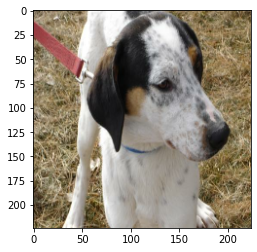

In [ ]:
num = 5
inference = (cat_dog_model.predict(image_batch[num:num+1]).item()>0.5)
inference = classes[inference]
plt.imshow(image_batch[num]/255)
print(f'Real Label: {classes[label_batch[num]]}')
print(f'Predicted Label: {inference}')

In [2]:
from tensorflow.keras.preprocessing import image

Predicted Label: cat


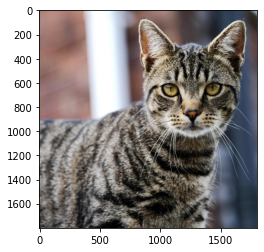

In [ ]:
img = image.img_to_array(image.load_img('cat.jpeg'))
inference = (cat_dog_model.predict(img[tf.newaxis, ...]).item()>0.5)
inference = classes[inference]
plt.imshow(img/255.)
print(f'Predicted Label: {inference}')

Predicted Label: dog


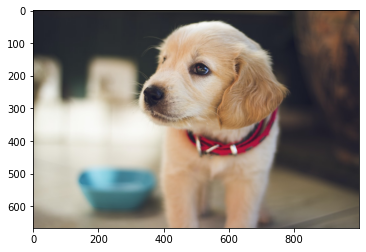

In [ ]:
img = image.img_to_array(image.load_img('dog.jpeg'))
inference = (cat_dog_model.predict(img[tf.newaxis, ...]).item()>0.5)
inference = classes[inference]
plt.imshow(img/255.)
print(f'Predicted Label: {inference}')